In [ ]:
#구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Mecal설치 위한 Git Clone
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
!pip install image

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 91 (delta 0), reused 0 (delta 0), pack-reused 90
Unpacking objects: 100% (91/91), done.


In [ ]:
ls

drive/  Mecab-ko-for-Google-Colab/  sample_data/


In [ ]:
cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab


In [ ]:
ls

images/                                    LICENSE
install_mecab-ko_on_colab190912.sh         README.md
install_mecab-ko_on_colab_light_210108.sh


In [ ]:
#Git clone했던 파일 중 설치파일 실행
! bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4 MB 7.6 MB/s 
     |████████████████████████████████| 86 kB 4.6 MB/s 
     |████████████████████████████████| 448 kB 77.8 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-11-26 02:50:13--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22e9:9f55, 2406:da00:ff00::22c0:3470, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=xX3g0F5hVo6zMiHDxWlq%2Fe%2BhAi8

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()
# 작동여부 테스트
# text = u"""이제 구글 코랩에서 Mecab-ko라이브러리 사용이 가능합니다. 읽어주셔서 감사합니다."""
# nouns = mecab.nouns(text)
# print(nouns)

In [ ]:
ls

images/                                    LICENSE
install_mecab-ko_on_colab190912.sh         README.md
install_mecab-ko_on_colab_light_210108.sh


In [ ]:
cd ..

/content


In [ ]:
ls

drive/                       mecab-ko-dic-2.1.1-20180720/        sample_data/
mecab-0.996-ko-0.9.2/        mecab-ko-dic-2.1.1-20180720.tar.gz
mecab-0.996-ko-0.9.2.tar.gz  Mecab-ko-for-Google-Colab/


In [ ]:
cd drive/My Drive/AI_study/Team10_Project/csv_file

/content/drive/My Drive/AI_study/Team10_Project/csv_file


In [ ]:
ls

kr18.csv  kr20.csv  wordcloud_title.png  youtube_image2.png


In [ ]:
import pandas as pd
import numpy as np

import konlpy
from konlpy.tag import Mecab
from tqdm import tqdm   #진행속도 표시

from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt

from PIL import Image
from wordcloud import ImageColorGenerator
from wordcloud import WordCloud

# WordCloud 한글 적용
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [ ]:
kr18 = pd.read_csv("kr18.csv")
kr20 = pd.read_csv("kr20.csv")

In [ ]:
# test_kr20 = kr20.head(5)
# text = kr20['title'].str.cat(sep=' ')
# text = test_kr20['title'].str.cat(sep=' ')

In [ ]:
#여기서 코로나 단어 추출
#코로나 연관 단어 및 불용어
corona_related_word =['코로나', '바이러스','변이', '백신', '거리두기', '코비드', 'corona', 
                'covid', '확진자', '사망자', '위드', '확진','마스크','전파자','방역', '자가격리', '비대면']
corona_not_related_word =['drama', '뮤직비디오', '머니', '부장', '염승', '무당', '공장', '영상', '꼬꼬', '비디오', '고왕', '특별']

#유튜브데이터에서 코로나와 연관된 영상들만 추출해준다.
#영어는 대문자, 소문자 구분이 되기 때문에 전부 소문자 형태로 바꿔주고 진행
expr01 = kr20['title'].str.lower().str.contains('|'.join(corona_related_word), na=False)
expr02 = kr20['tags'].str.lower().str.contains('|'.join(corona_related_word), na=False)
expr03 = kr20['title'].str.lower().str.contains('|'.join(corona_not_related_word), na=False)
expr04 = kr20['tags'].str.lower().str.contains('|'.join(corona_not_related_word), na=False)
corona_related_filter = ((expr01)|(expr02))&~((expr03)|(expr04))
kr20_1=kr20[corona_related_filter]


In [ ]:
tokenizer = Mecab()
title_list = [ tokenizer.pos(x) for x in tqdm(kr20_1['title']) ]
tags_list = [ tokenizer.pos(x) for x in tqdm(kr20_1['tags']) ]

100%|██████████| 1172/1172 [00:00<00:00, 3691.53it/s]


In [ ]:
tags_nouns = []

for x in range(len(tags_list)):
  for i in range(len(tags_list[x])):
    if tags_list[x][i][1] == 'NNG':
      if len(tags_list[x][i][0]) == 1:   # 한글자 명사 제거
        continue
      tags_nouns.append(tags_list[x][i][0])
tags_nouns = ' '.join(tags_nouns)
tags_nouns

'만만 호두 주식 뉴스쇼 경제 수석 대강 사업 추경 방통 위원장 검사 수석 납골당 부동산 감독 기구 뉴스쇼 숙명 여고 백신 숙명 여고 쌍둥이 백신 방통 변호사 뉴스쇼 경제 수석 대강 사업 추경 방통 위원장 검사 수석 납골당 부동산 감독 기구 만만 호두 주식 금융 금융 교육 금융 문맹 금융 투자 주식 주식 투자 주식 교육 펀드 펀드 투자 투자 투자 교육 재테크 노후 노후 준비 노후 대책 복리 효과 복리 주식 강의 주식 강좌 대표 특강 주식 공부 주식 초보 주식 부자 주식 종목 주식 시장 금융 상식 펀드 매니저 애널리스트 체크카드 수입 소득 지출 통장 경제 위기 주식 펀드 연금 개인 연금 퇴직 연금 금리 자율 이자 배당 회전율 멘탈 부동산 여유 자금 은행 예금 타이밍 원금 보장 배당 소득 펀드 헤지 펀드 장기 투자 연금 저축 저축 펀드 인덱스 펀드 사모 펀드 공모 펀드 펀드 경제 독립 버스 대표 주니어 펀드 샐러리맨 펀드 펀드 우먼 펀드 펀드 코스닥 하락 폭락 상승 경제 주식 연금 저축 펀드 연금 저축 보험 연금 펀드 적금 연말 정산 연금 제도 세액 공제 세금 상장 주식 상장 전염병 주식 서킷 브레이크 사이드카 동학 개미 운동 닥터 의학 상식 의사 병원 의학 정보 의사 파업 의대 휴학 국시 거부 덕분 파업 의사 파업 공공 의대 의대 증원 지역 의사 지역 의사 티비 종편 종합 편성 뉴스 뉴스 뉴스 프로그램 채널 뉴스 뉴스 도심 집회 보수 진보 법원 금융 금융 교육 금융 문맹 금융 투자 주식 주식 투자 주식 교육 펀드 펀드 투자 투자 투자 교육 재테크 노후 노후 준비 노후 대책 복리 효과 복리 주식 강의 주식 강좌 대표 특강 주식 공부 주식 초보 주식 부자 주식 종목 주식 시장 금융 상식 펀드 매니저 애널리스트 체크카드 수입 소득 지출 통장 경제 위기 주식 펀드 연금 개인 연금 퇴직 연금 금리 자율 이자 배당 회전율 멘탈 부동산 여유 자금 은행 예금 타이밍 원금 보장 배당 소득 펀드 헤지 펀드 장기 투자 연금 저축 저축 펀드 인덱스 펀드 사모 펀드 공모 펀드 펀드 경

In [ ]:
title_nouns = []

for x in range(len(title_list)):
  for i in range(len(title_list[x])):
    if title_list[x][i][1] == 'NNG':
      if len(title_list[x][i][0]) == 1:   # 한글자 명사 제거
        continue
      title_nouns.append(title_list[x][i][0])
title_nouns = ' '.join(title_nouns)
title_nouns

'주식 백신 어린이 노약자 투기 가능 경제 수석 상혁 그때 정치인 기부 약속 오수정 뉴스쇼 숙명 여고 쌍둥이 직접 통화 백신 투기 가능 경제 수석 상혁 그때 정치인 기부 약속 오수정 뉴스쇼 주식 백신 어린이 노약자 대표 주식 의대 증원 공공 의대 생각 의사 파업 감염 확산 광복절 집회 도심 곳곳 인파 대표 주식 광화문 광장 보수 단체 문재 정부 실정 분노 충격 속보 광화문 현장 파괴 광신도 의대 증원 공공 의대 생각 의사 파업 대표 주식 감염 확산 광복절 집회 도심 곳곳 인파 뉴스 사망자 충격 속보 광화문 현장 파괴 광신도 광화문 광장 보수 단체 문재 정부 실정 분노 의대 증원 공공 의대 생각 의사 파업 대표 주식 감염 확산 광복절 집회 도심 곳곳 인파 주식 시작 어린이 노약자 뉴스 파묘 생각 마이크 대책 뉴스 사망자 속보 시사 창고 폭염 경보 부업 경제 특집 충격 속보 광화문 현장 파괴 광신도 광화문 광장 보수 단체 문재 정부 실정 분노 의대 증원 공공 의대 생각 의사 파업 대표 주식 폭발 수상 뉴스 논평 뉴스 한국인 천민 현상 마이크 대책 뉴스 파묘 생각 폭염 경보 부업 경제 특집 속보 시사 창고 충격 속보 광화문 현장 파괴 광신도 광화문 광장 보수 단체 문재 정부 실정 분노 시사 창고 국회의원 지사 경찰 실랑이 폭발 수상 뉴스 논평 뉴스 개혁 시늉 뉴스 한국인 천민 현상 한밤 토크 공포 마케팅 신의 폭염 경보 부업 경제 특집 충격 속보 광화문 현장 파괴 광신도 집회 목사 생각 대통령 방역 이용 삼류 정치 중단 국민 최고 위원회 국회의원 지사 경찰 실랑이 속보 코로나 확산 자료 폭발 수상 뉴스 논평 폭염 경보 부업 경제 특집 빤쓰 뚜껑 통합 집회 목사 생각 시작 생계 긴급 사랑 교회 긴박 경찰 대치 현장 국회의원 지사 경찰 실랑이 속보 코로나 확산 자료 폭발 수상 뉴스 논평 집회 목사 생각 국회의원 지사 경찰 실랑이 속보 코로나 확산 자료 공무원 월급 재난 지원 가능 눈치 어처구니 완치 속보 확진 발생 민주 노총 검사 거부 뉴스 공포 사망자 집회 목사 생각

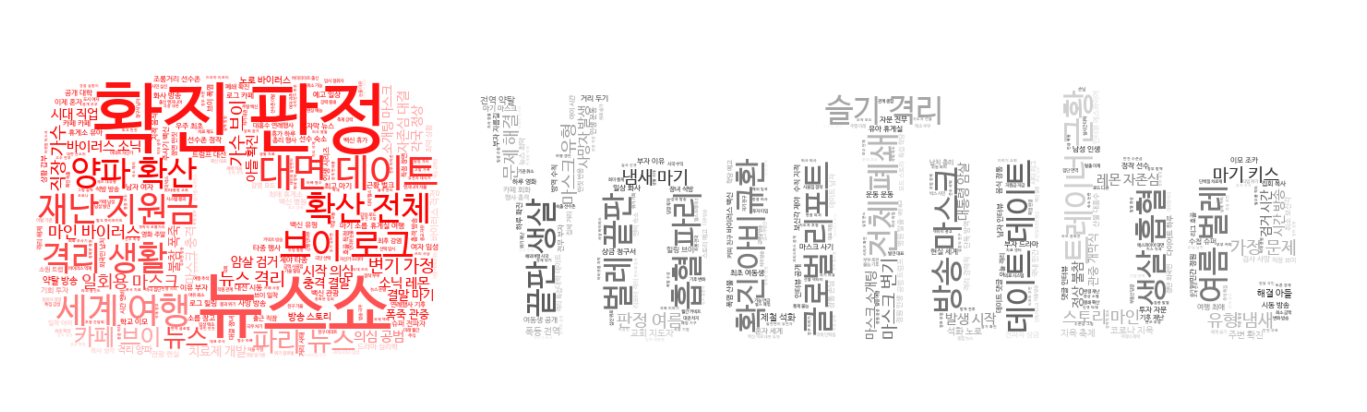

In [ ]:
# WordCloud image 설정 / font_path 설정 필수
youtube_mask = np.array(Image.open('youtube_image.PNG'))

wc = WordCloud(font_path=fontpath, 
               background_color='white', 
               mask = youtube_mask,
               width=4000, 
               height=2000, 
               max_words=500,
               max_font_size=300)

# 이미지 색상에 맞게 글꼴 색 변경
image_colors = ImageColorGenerator(youtube_mask)

# WordCloud 저장
wc.generate(str(title_nouns))
wc.to_file('youtube_title.png')

# WordCloud 출력
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')			# X, Y 축이 사라진다
plt.show()

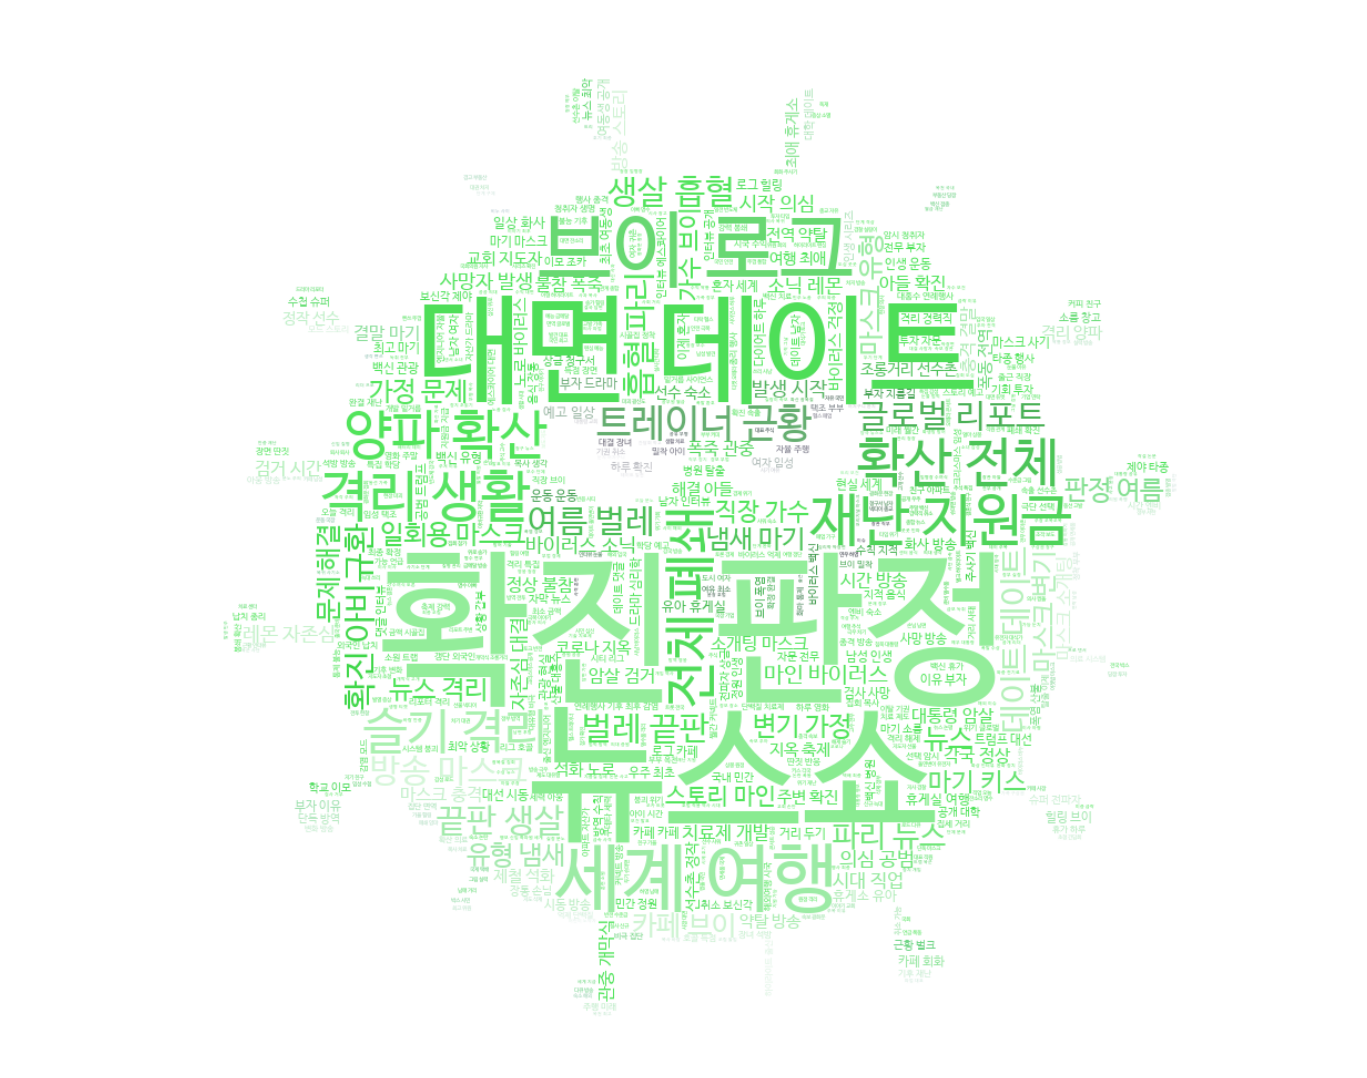

In [ ]:
# WordCloud image 설정 / font_path 설정 필수
youtube_mask = np.array(Image.open('virus_image3.png'))

wc = WordCloud(font_path=fontpath, 
               background_color='white', 
               mask = youtube_mask,
               width=4000, 
               height=2000, 
               max_words=700,
               max_font_size=150)

# 이미지 색상에 맞게 글꼴 색 변경
image_colors = ImageColorGenerator(youtube_mask)

# WordCloud 저장
wc.generate(str(title_nouns))
wc.to_file('virus_title.png')

# WordCloud 출력
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')			# X, Y 축이 사라진다
plt.show()

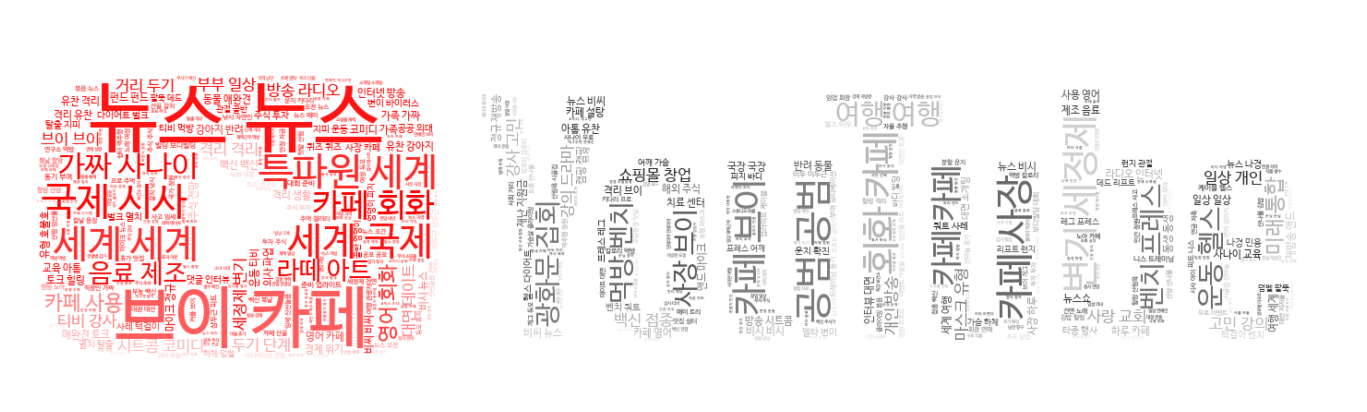

In [ ]:
# WordCloud image 설정 / font_path 설정 필수
youtube_mask = np.array(Image.open('youtube_image.PNG'))

wc = WordCloud(font_path=fontpath, 
               background_color='white', 
               mask = youtube_mask,
               width=4000, 
               height=2000, 
               max_words=500,
               max_font_size=300)

# 이미지 색상에 맞게 글꼴 색 변경
image_colors = ImageColorGenerator(youtube_mask)

# WordCloud 저장
wc.generate(str(tags_nouns))
wc.to_file('youtube_tags.png')

# WordCloud 출력
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')			# X, Y 축이 사라진다
plt.show()

In [ ]:
# tokenizer = Mecab()

# # (value, key) 형식으로 토큰화 -> 
# title_list = [ tokenizer.pos(x) for x in tqdm(kr20['title']) ]


# # 2글자 이상 명사(NNG) 추출
# title_nouns = []

# for x in range(len(title_list)):
#   for i in range(len(title_list[x])):
#     if title_list[x][i][1] == 'NNG':
#       if len(title_list[x][i][0]) == 1:   # 한글자 명사 제거
#         continue
#       title_nouns.append(title_list[x][i][0])
# title_nouns = ' '.join(title_nouns)


# # WordCloud 설정, 저장 및 출력, font_path 설정 필수!
# wc = WordCloud(font_path=fontpath, background_color='white', width=1000, height=1000, max_words=200, max_font_size=300)
# cloud = wc.generate(title_nouns)
# cloud.to_file('wordcloud_title.png')

# plt.figure(figsize=(12,12))
# plt.imshow(cloud)
# plt.axis('off')			# X, Y 축 생략
# plt.show()